In [115]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
%matplotlib inline



In [34]:
df_raw = pd.read_csv('bank_full.csv')

In [35]:
df_raw.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,take_up
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [36]:
df_raw.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,take_up
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [37]:
df_raw.shape

(45211, 17)

age
default
balance
housing
loan
day
duration
campaign
pdays
previous
take_up


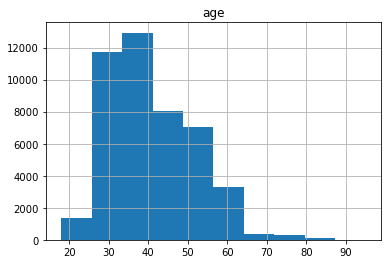

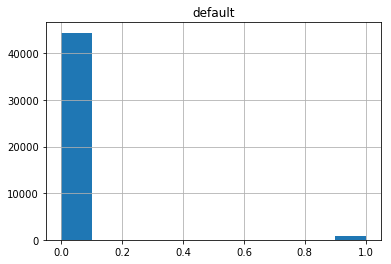

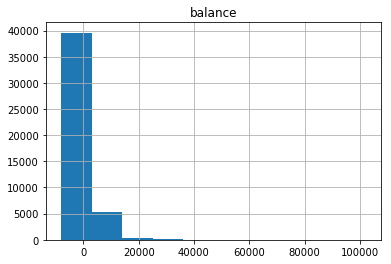

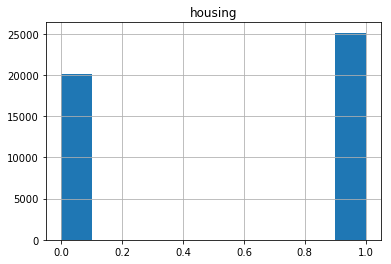

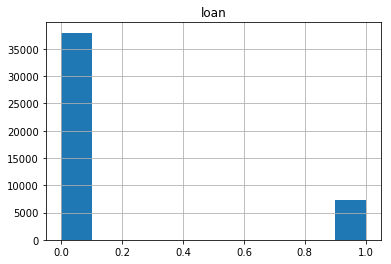

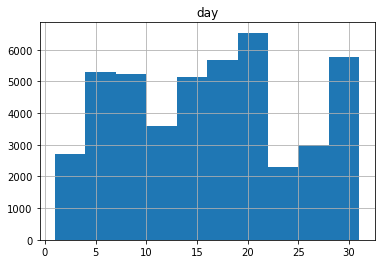

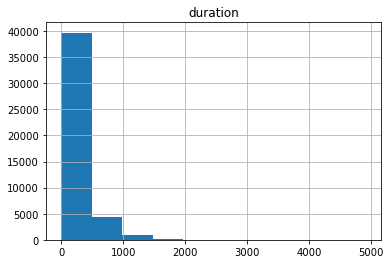

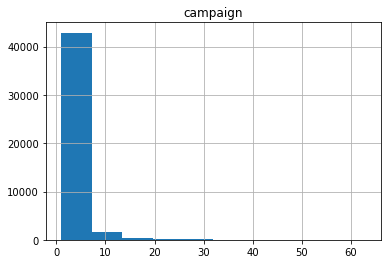

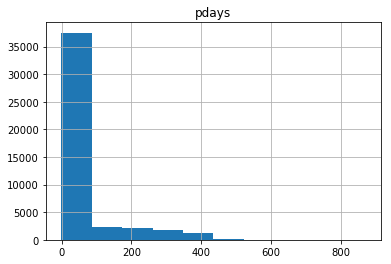

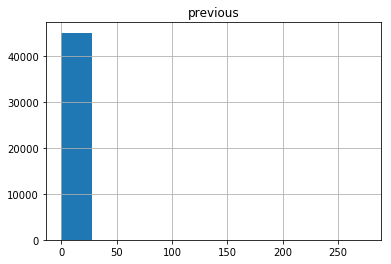

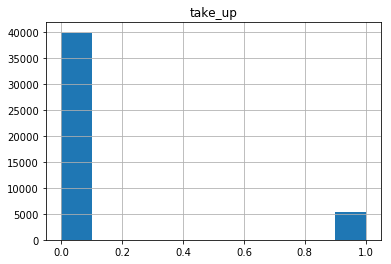

In [38]:
# take only numerical columns for plotting purpose
df_numerical = df_raw.select_dtypes(exclude=['object'])
for columns in df_numerical:
    print(columns)
    pd.DataFrame.hist(df_numerical, column=columns)

In [39]:
#convert categorical values numerical values
df_encoded = pd.get_dummies(df_raw)

age
default
balance
housing
loan
day
duration
campaign
pdays
previous
take_up
job_admin.
job_blue-collar
job_entrepreneur
job_housemaid
job_management
job_retired
job_self-employed
job_services
job_student
job_technician
job_unemployed


C:\Users\atish\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


job_unknown
marital_divorced
marital_married
marital_single
education_primary
education_secondary
education_tertiary
education_unknown
contact_cellular
contact_telephone
contact_unknown
month_apr
month_aug
month_dec
month_feb
month_jan
month_jul
month_jun
month_mar
month_may
month_nov
month_oct
month_sep
poutcome_failure
poutcome_other
poutcome_success
poutcome_unknown


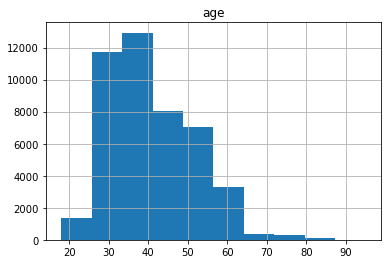

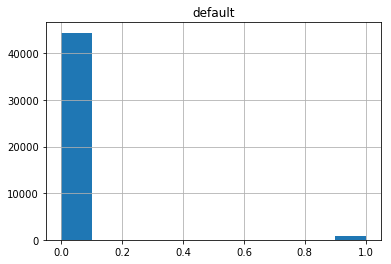

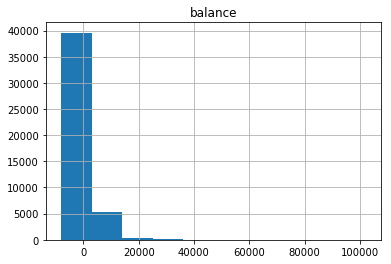

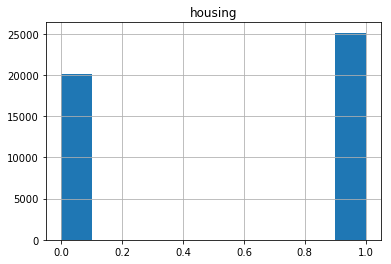

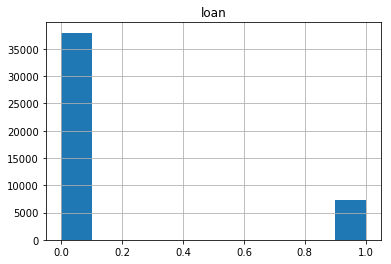

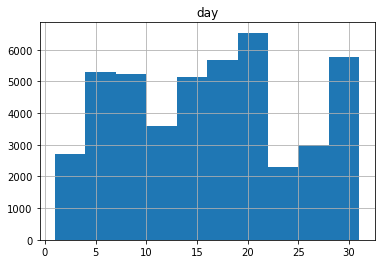

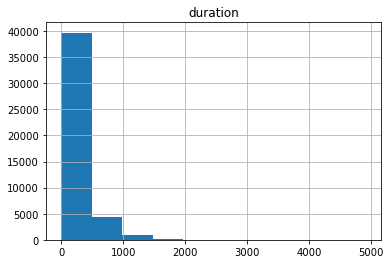

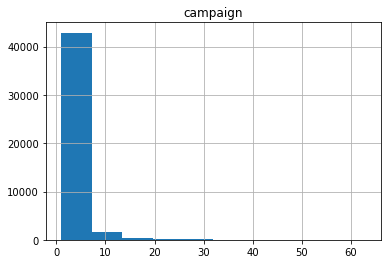

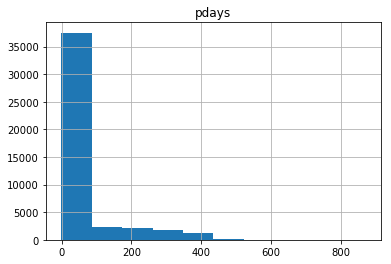

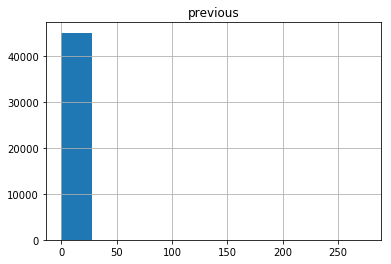

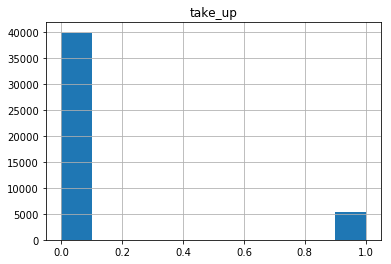

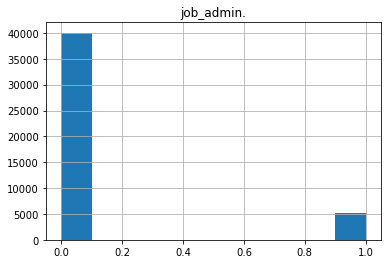

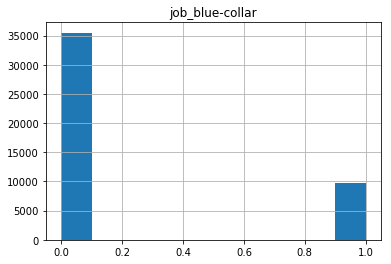

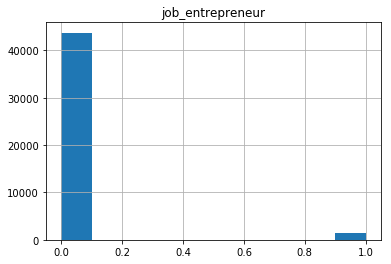

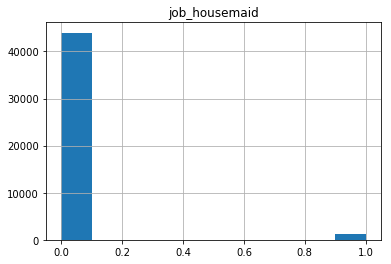

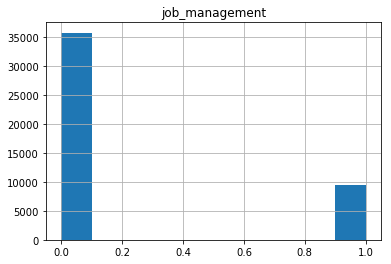

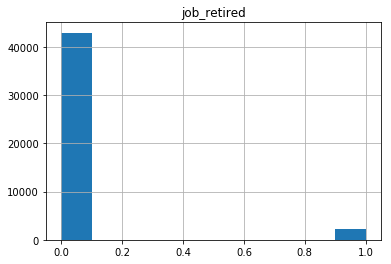

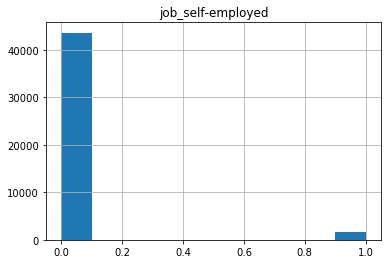

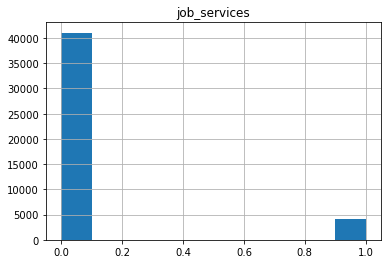

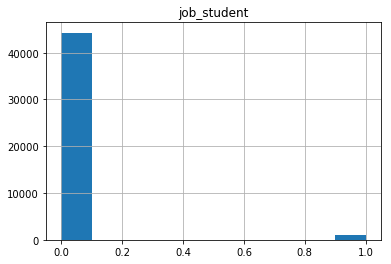

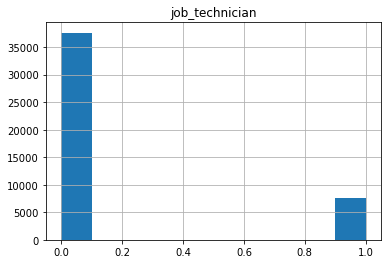

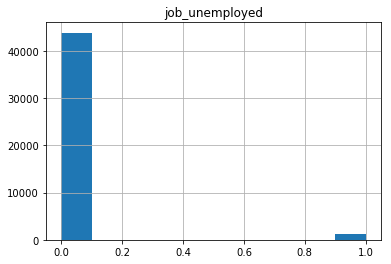

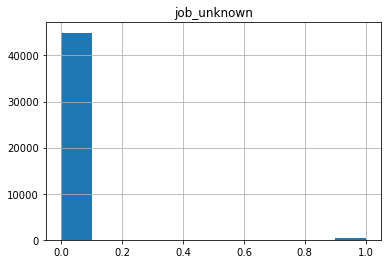

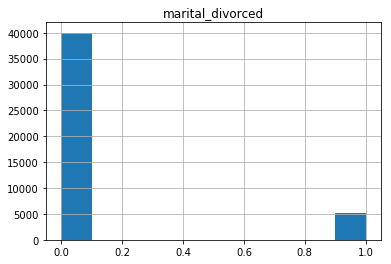

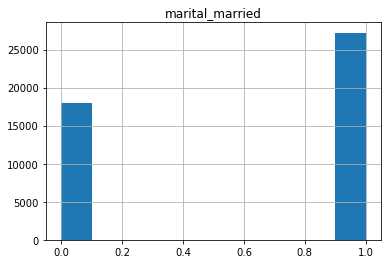

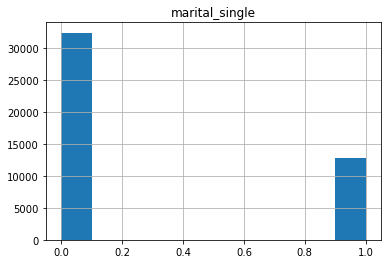

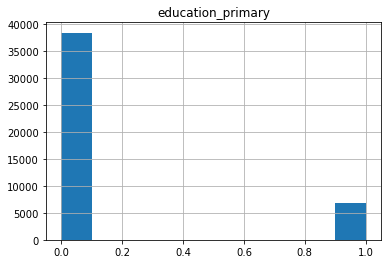

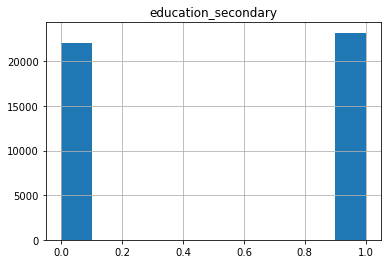

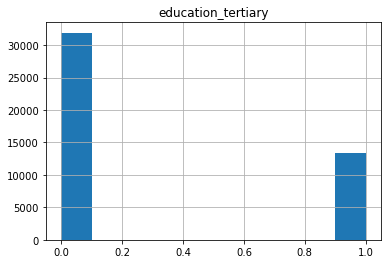

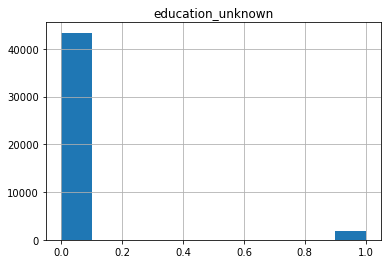

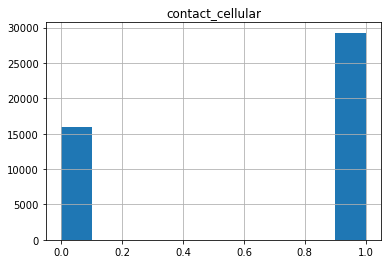

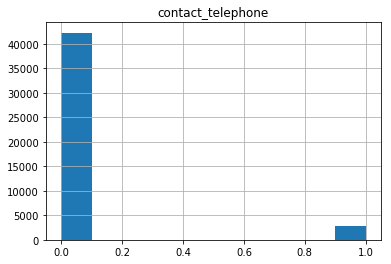

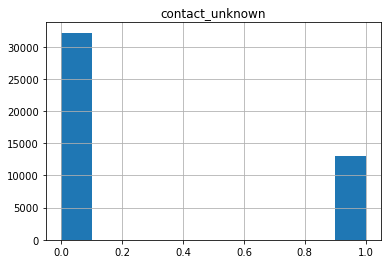

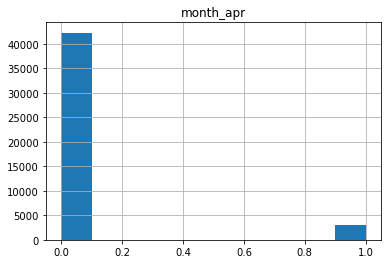

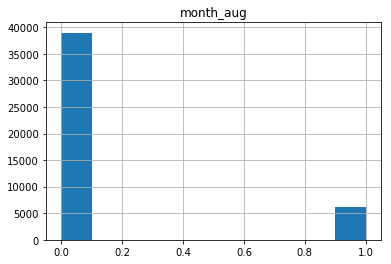

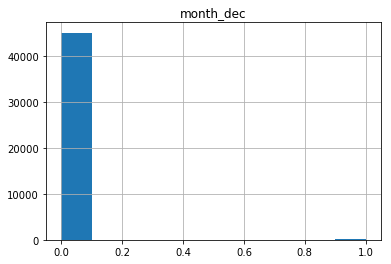

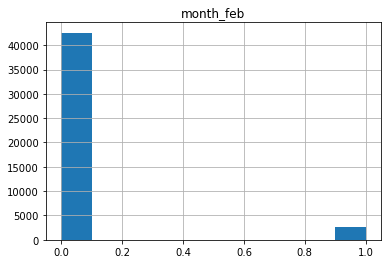

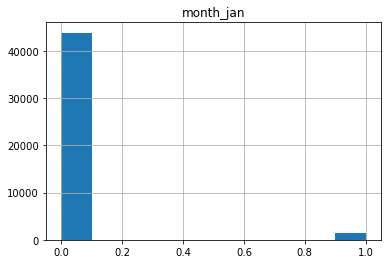

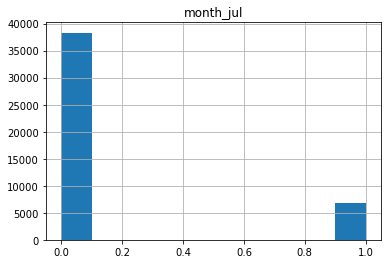

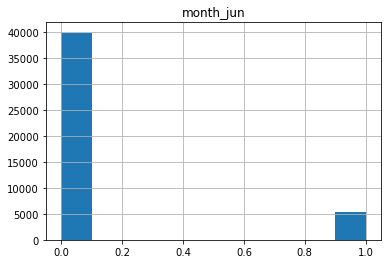

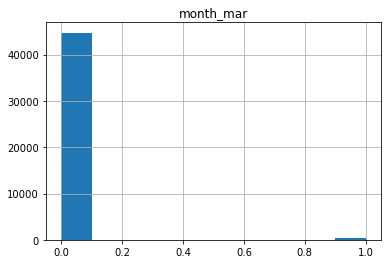

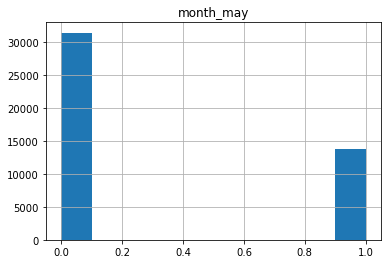

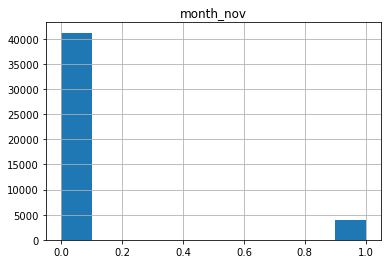

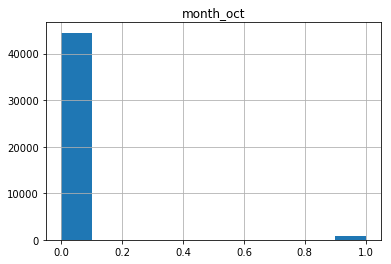

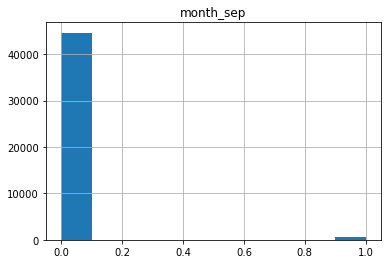

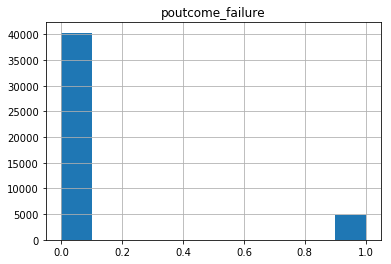

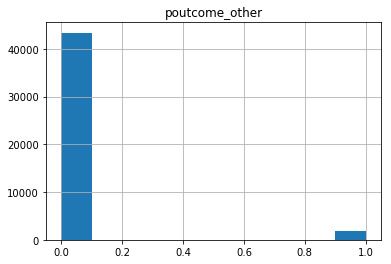

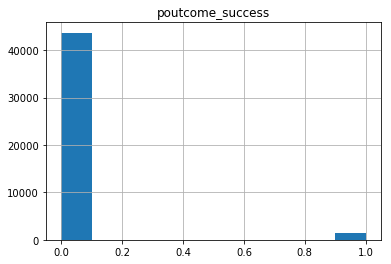

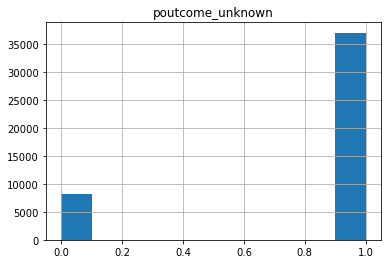

In [40]:
# take only numerical columns for plotting purpose
df_numerical = df_encoded.select_dtypes(exclude=['object'])
for columns in df_numerical:
    print(columns)
    pd.DataFrame.hist(df_numerical, column=columns)

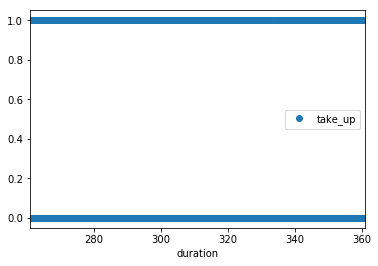

In [47]:
df_encoded.plot(x='duration', y='take_up', style='o')

In [144]:
df_encoded.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'take_up', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [153]:
#split the outcome and input variables
X = df_encoded.drop('take_up', axis=1)
y = df_encoded.loc[:, 'take_up']


In [155]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: take_up, dtype: int64

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=201707)

In [157]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X_train, y_train)


# check the accuracy on the training set
scores = model.score(X_train, y_train)
y_pred = model.predict(X_test)

In [158]:
#logistic AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
logit_roc_auc = metrics.roc_auc_score(y_test, y_pred)


#print(metrics.auc(fpr, tpr))
print("Logistic AUC = %2.6f" % logit_roc_auc)
print(metrics.classification_report(y_test,y_pred ))


print("Accuracy :" + str(scores.mean()))
#print("Std Dev: " + str(scores.std()))

print("Logistic accuracy is %2.2f" % accuracy_score(y_test,model.predict(X_test)))

Logistic AUC = 0.670108
             precision    recall  f1-score   support

          0       0.92      0.98      0.95      7975
          1       0.66      0.37      0.47      1068

avg / total       0.89      0.90      0.89      9043

Accuracy :0.901376907764
Logistic accuracy is 0.90


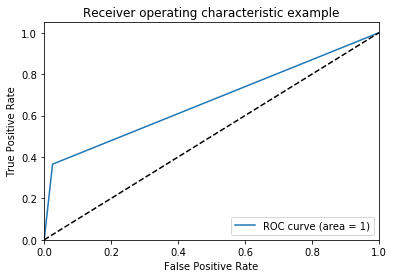

In [159]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [160]:
print(metrics.confusion_matrix(y_test, y_pred))

[[7776  199]
 [ 678  390]]


In [161]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X_train, y_train, scoring='accuracy', cv=10)

In [162]:
scores

array([ 0.9013267 ,  0.90129942,  0.89798175,  0.90157589,  0.89908764,
        0.89659939,  0.89798175,  0.90431416,  0.90929204,  0.89988938])